# Exercise - Matplotlib Basics

## Topics Covered

This exercise goes over:

* Matplotlib horizontal bar chart
* Labeling

## Question

Graph the average salary (`salary_year_avg`) by `job_title_short` as a horizontal bar chart. Order it from the highest salary to the lowest. Include a title, and labels for the x & y-axis.

### Load Data

In [1]:
# Install datasets Library (if not already installed)
# !pip install -U datasets

# Importing Libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

### Get the Median Salary

We're going to get the median salary using `groupby()` to group by the job title then we'll use `median()` method.

Finally, we'll add sorting to our data (which we'll need when plotting).

#### Note: Median vs. Mean

We could have used the average for this, but based on my analysis it's best not.

Salaries often follow a skewed distribution where most employees earn on the lower end of the scale, and a few high earners pull the average (mean) up. In such cases, the mean does not accurately reflect the earnings of the majority.

TLDR: Use median for salary analysis.

In [2]:
# Get the average salary by job title
job_salary = df.groupby('job_title_short')['salary_year_avg'].median().sort_values()

job_salary

,salary_year_avg
job_title_short,
Business Analyst,85000.0
Cloud Engineer,90000.0
Data Analyst,90000.0
Software Engineer,99150.0
Machine Learning Engineer,106415.0
Senior Data Analyst,111175.0
Data Engineer,125000.0
Data Scientist,127500.0
Senior Data Engineer,147500.0


### Plot the Chart

Plot the horizontal bar chart.

Text(0.5, 1.0, 'Median Salary by Job Title')

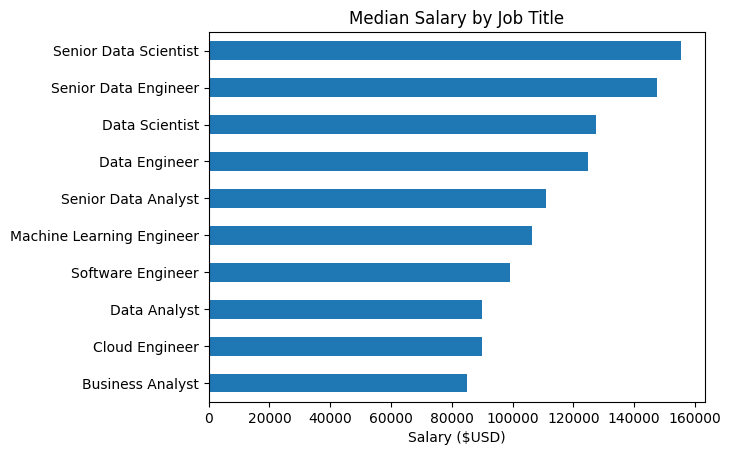

In [3]:
# Plot the chart
job_salary.plot(kind = "barh")

# Customize the chart
plt.xlabel('Salary ($USD)')
plt.ylabel("")
plt.title('Median Salary by Job Title')

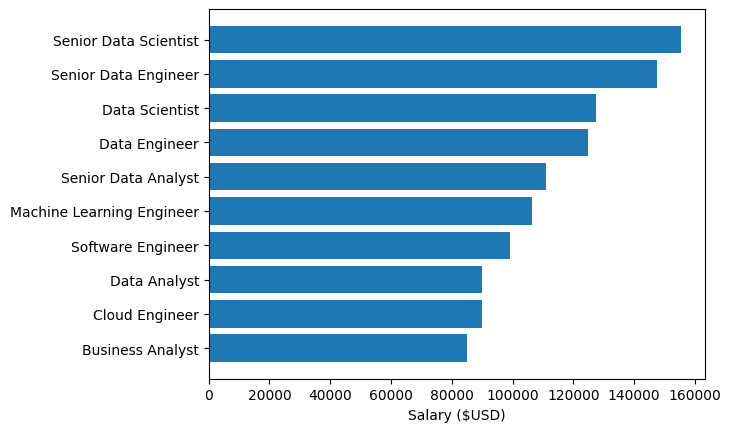

In [4]:
plt.barh(job_salary.index, job_salary)
plt.xlabel('Salary ($USD)')
plt.ylabel("")

plt.show()